# The ESGF Virtual Aggregation

The ESGF Virtual Aggregation is an analysis of a new proposed data workflow and a companion dataset that aims to advance the sharing and reuse of scientific climate data stored in the Earth System Grid Federation. The ESGF holds several petabytes of data distributed between data centers around the globe and the data workflow proposal enhances the federation, beyond file search and download, by allowing remote climate data analysis on data analysis ready, virtually aggregated, climate datasets. The companion dataset serves as demonstration of a viable implementation of the data workflow and it includes all CMIP6 data from ESGF up to 2022. The ESGF Virtual aggregation analysis serves as a test case for the viability of the data workflow and provides the basis for discussions on the future of the ESGF infrastructure, regarding the continuity of federation services such as OpenDAP and the Search REST API.

In [1]:
import xarray
import dask

In [2]:
dask.config.set(scheduler="processes")

In [3]:
dataset = "http://localhost:8080/thredds/dodsC/esgeva/demo/CMIP6_CMIP_BCC_BCC-CSM2-MR_esm-hist_day_tasmax_gn_v20181128_aims3.llnl.gov.ncml"
ds = xarray.open_dataset(dataset).chunk({"time": 100})
ds

<xarray.Dataset>
Dimensions:           (lat: 160, bnds: 2, lon: 320, time: 60225, variant_label: 3, nfiles: 21, file: 2)
Coordinates:
  * lat               (lat) float64 -89.14 -88.03 -86.91 ... 86.91 88.03 89.14
  * lon               (lon) float64 0.0 1.125 2.25 3.375 ... 356.6 357.8 358.9
    height            float64 ...
  * time              (time) object 1975-01-01 12:00:00 ... 1989-12-31 12:00:00
  * variant_label     (variant_label) |S64 b'r1i1p1f1' b'r2i1p1f1' b'r3i1p1f1'
Dimensions without coordinates: bnds, nfiles, file
Data variables:
    lat_bnds          (lat, bnds) float64 dask.array<chunksize=(160, 2), meta=np.ndarray>
    lon_bnds          (lon, bnds) float64 dask.array<chunksize=(320, 2), meta=np.ndarray>
    time_bnds         (time, bnds) object dask.array<chunksize=(100, 2), meta=np.ndarray>
    further_info_url  (nfiles, file) |S64 dask.array<chunksize=(21, 2), meta=np.ndarray>
    tracking_id       (nfiles, file) |S64 dask.array<chunksize=(21, 2), meta=np.ndarray>
    tasmax            (variant_label, time, lat, lon) float32 dask.array<chunksize=(3, 100, 160, 320), meta=np.ndarray>
Attributes: (12/55)
    Conventions:            
    activity_id:            CMIP
    branch_method:          no parent
    branch_time_in_child:   0.0
    branch_time_in_parent:  2147.0
    comment:                The model integration starts from the esm-piContr...
    ...                     ...
    size:                   2147483647
    size_human:             34.5 GiB
    __info__:               Virtual dataset generated by the ESGF Virtual Agg...
    __license__:            This is a derived dataset product from ESGF, same...
    version:                v20181128
    replica:                1

In [4]:
%time m = ds["tasmax"].mean(["lat", "lon"]).compute()

CPU times: user 774 ms, sys: 108 ms, total: 882 ms
Wall time: 25min 12s


In [5]:
ds.attrs["size_human"]

'34.5 GiB'

In [8]:
print("Throughtput: {} MiB/s".format(34.5 * 2**10 / (25*60+12)))

Throughtput: 23.365079365079364 MiB/s


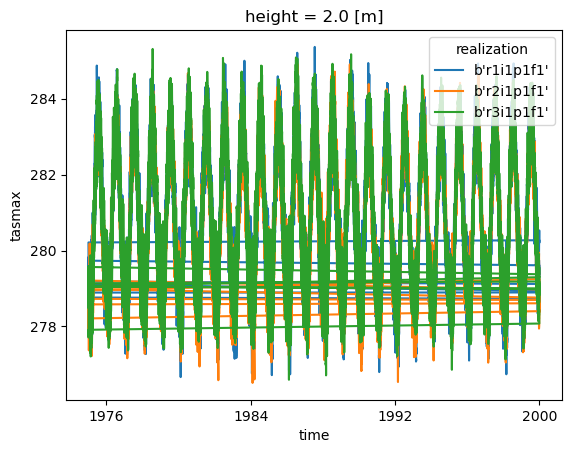

In [22]:
m.plot.line(x="time")